Heart Failure Prediction
12 Clinical features for predicting mortality by heart failure.
 Create a model for predicting mortality by heart failure.

[Data Source](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


Project Aim:
Exploratory data analysis, visualization, and prediction of mortality by heart failure.


continuous variables: creatine_phosphokinase, age, ejection_fraction, platelets, serum_creatinine, serum_sodium, tiime

categorical variables: anaemia, diabetes, high_blood pressure, sex, smoking, death event.

Data dictionary

Sex - Gender of patient Male = 1, Female =0

Age - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes

Anaemia - 0 = does not have anemia, 1 = has anemia

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#mount drive
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:

#import data
data = pd.read_csv('/content/gdrive/MyDrive/DS_Projects/heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
#check for null
data.isnull().any().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


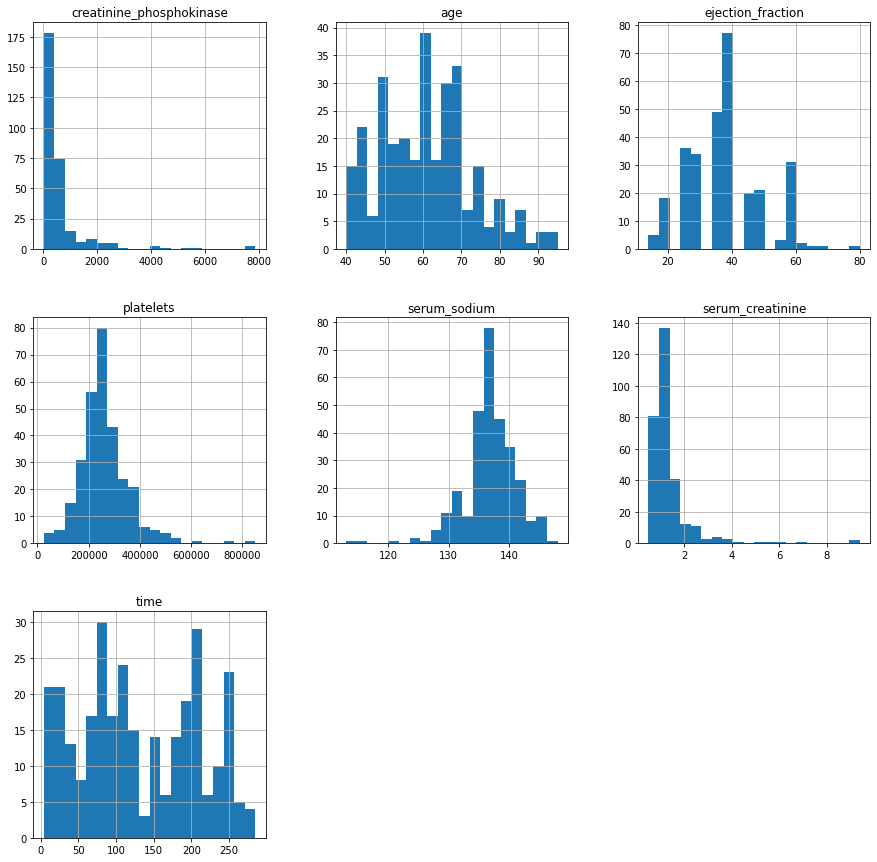

In [6]:
#Visualize distribution of continuous variables
cont_variables = data[['creatinine_phosphokinase', 'age', 'ejection_fraction', 'platelets', 'serum_sodium', 
      'serum_creatinine', 'time']]
cont_variables.hist(bins = 20, figsize=(15, 15))
plt.show()

Shows a glace of where the majority of the population lies and the nature of the distribution for each continuous variable.

In [7]:
#check statistical parameters of the continuous variables

cont_variables.describe()

,creatinine_phosphokinase,age,ejection_fraction,platelets,serum_sodium,serum_creatinine,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,581.839465,60.833893,38.083612,263358.029264,136.625418,1.39388,130.260870
std,970.287881,11.894809,11.834841,97804.236869,4.412477,1.03451,77.614208
min,23.000000,40.000000,14.000000,25100.000000,113.000000,0.50000,4.000000
25%,116.500000,51.000000,30.000000,212500.000000,134.000000,0.90000,73.000000
50%,250.000000,60.000000,38.000000,262000.000000,137.000000,1.10000,115.000000
75%,582.000000,70.000000,45.000000,303500.000000,140.000000,1.40000,203.000000
max,7861.000000,95.000000,80.000000,850000.000000,148.000000,9.40000,285.000000


In [8]:
#create new column to store changed binary values to 'yes' and 'no' in sex and death
data['sex1'] = data['sex'].replace({1:'Male', 0:'Female'})
data['DEATH_EVENT1'] = data['DEATH_EVENT'].replace({1:'Yes', 0:'No'})

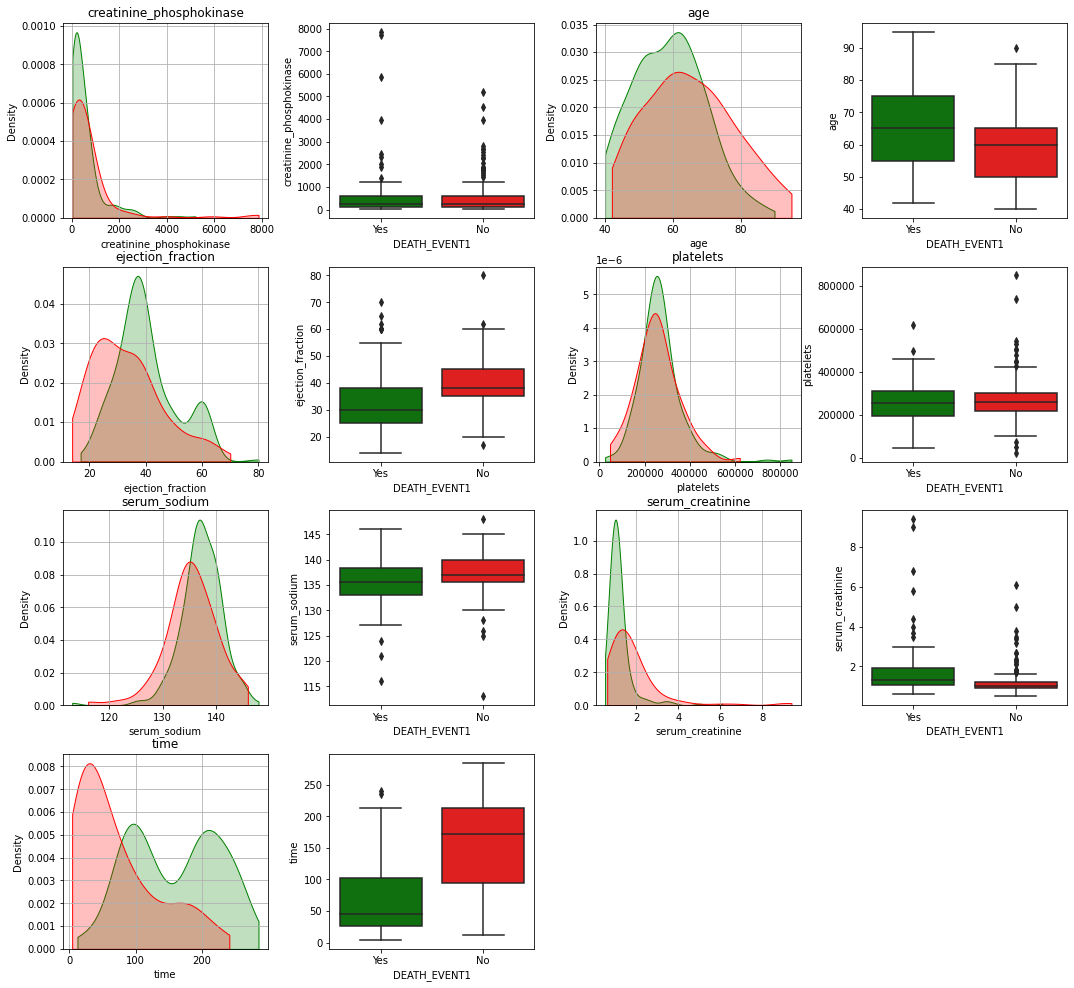

In [9]:
#visualize death and no death events distribution among males and females using boxplot

plt.figure(figsize = (18, 26))
for i, col in enumerate(cont_variables):
  plt.subplot(6, 4, i * 2 + 1)
  plt.subplots_adjust(hspace = .25, wspace=.3)

  plt.grid(True)
  plt.title(col)
  sns.kdeplot(data.loc[data['DEATH_EVENT1']== 'No', col], label='alive', color='green', shade=True, kernel='gau', cut=0)
  sns.kdeplot(data.loc[data['DEATH_EVENT1']== 'Yes', col], label='dead', color='red', shade=True, kernel='gau', cut=0)
  plt.subplot(6, 4, i * 2 + 2)
  sns.boxplot(y = col, data=data, x = 'DEATH_EVENT1', palette = ['green', 'red']);

From the distribution, not all the variables are normally distributed, some are skewed and mean alone will not be representative for each one.

In [10]:
#check mean and median of death event for each of the variable
y = data.groupby('DEATH_EVENT1')['creatinine_phosphokinase', 'age', 'ejection_fraction', 'platelets', 'serum_sodium', 
      'serum_creatinine', 'time', 'DEATH_EVENT1'].agg([np.mean, np.median])
y

creatinine_phosphokinase               age         \
                                 mean median       mean median   
DEATH_EVENT1                                                     
No                         540.054187  245.0  58.761906   60.0   
Yes                        670.197917  259.0  65.215281   65.0   

             ejection_fraction             platelets           serum_sodium  \
                          mean median           mean    median         mean   
DEATH_EVENT1                                                                  
No                    40.26601   38.0  266657.489901  263000.0   137.216749   
Yes                   33.46875   30.0  256381.044792  258500.0   135.375000   

                    serum_creatinine               time         
             median             mean median        mean median  
DEATH_EVENT1                                                    
No            137.0         1.184877    1.0  158.339901  172.0  
Yes           135.5         1.835833    1.3   70.885417   44.5

Time variable is very different between the death events, an investigation may be necessary to ascertain why. Also, check the effect of other variables on death event conditioned by gender.

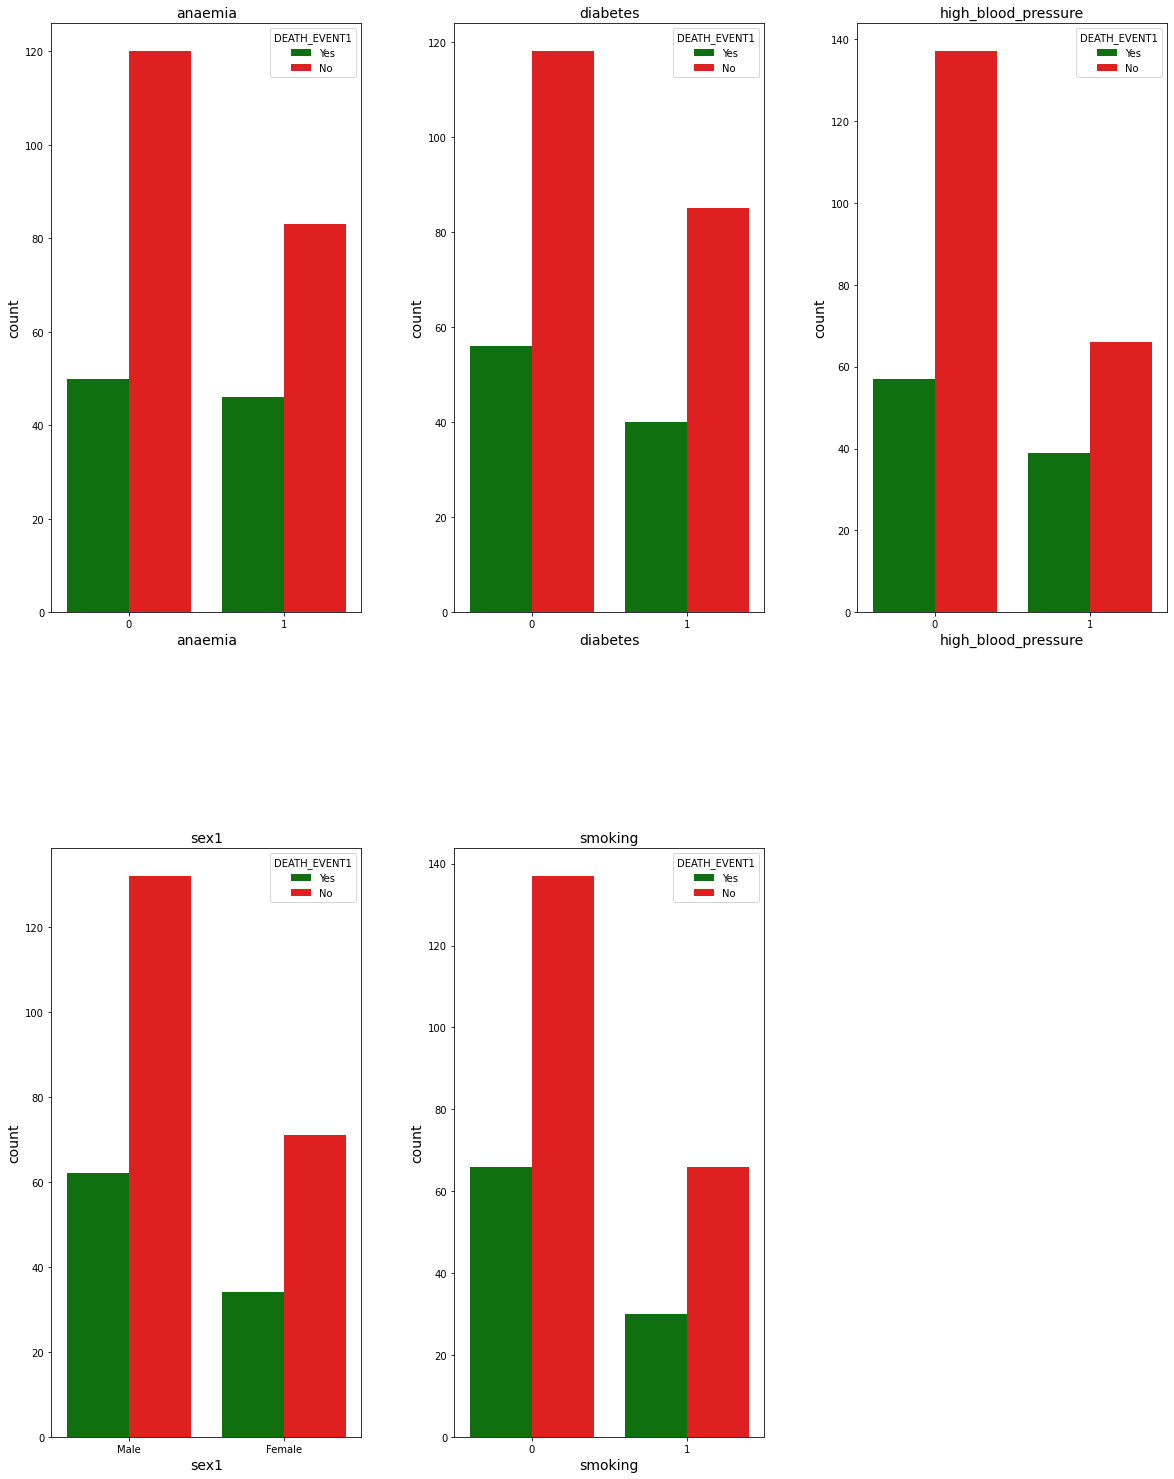

In [12]:
# visuaize the relationship between categorical variables and the death
cat_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex1', 'smoking']
plt.figure(figsize=(20, 26))

for i, cat_variable in enumerate(cat_variables):
  plt.subplot(2, 3, i+1)
  plt.title(cat_variable, fontsize = 14)
  plt.xlabel(cat_variable, fontsize =14)
  plt.ylabel('Count', fontsize=14)
  plt.subplots_adjust(hspace=0.4, wspace=0.3)
  sns.countplot(data=data, x = cat_variable, hue='DEATH_EVENT1', palette=['green', 'red']);

Plot shows there is a difference in the number of death and no death for each variable and also shows that the dataset is not balanced. One can identify the imbalance percentage for each feature.

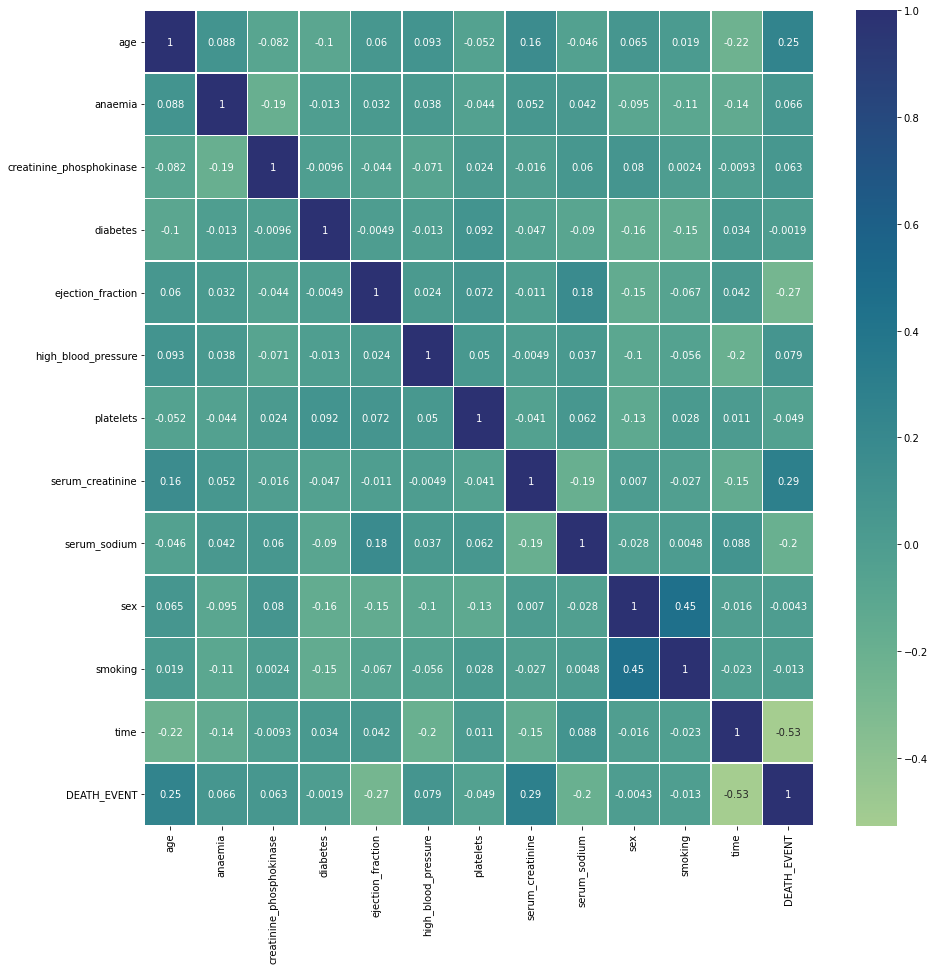

In [13]:
#check relationship between features using correlation heatmap

plt.figure(figsize=(15,15))

sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap='crest')
plt.show()

The correlation between target variable and creatinine_phosphokinase, anaemia, diabetes, sex, smoking is very low. The remainder features can be used in predicting the target.

In [14]:
data = data.drop(columns= ['sex1', 'DEATH_EVENT1']) # drop string columns

In [15]:
#use selectkbest to identify top features

#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import *

#split data into input and features
X = data.drop(columns= 'DEATH_EVENT')
y = data['DEATH_EVENT']

#check shape
print(X.shape, y.shape)

#select k best to extract top features
top = SelectKBest(score_func=f_classif, k='all')
fit = top.fit(X,y)

#extract scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

#concatenate scores and columns
features = pd.concat([columns, scores], axis = 1)
#rename columns
features.columns=['Features', 'Score']

#sort
features.sort_values(by='Score', ascending=False, ignore_index=True)


(299, 12) (299,)


,Features,Score
0,time,114.181264
1,serum_creatinine,28.158492
2,ejection_fraction,23.094063
3,age,20.435946
4,serum_sodium,11.765331
5,high_blood_pressure,1.881937
6,anaemia,1.310096
7,creatinine_phosphokinase,1.173259
8,platelets,0.718880
9,smoking,0.047333


For Sklearn's SelectBest, anaemia and creatinine_phosphokinase are ranked above platelets and other features compared to the correlation result. 


#Prediction

Data Preparation

In [16]:
#data preparation
#drop non-numeric features
data = data.drop(columns=['creatinine_phosphokinase', 'anaemia', 'diabetes', 'sex', 'smoking'])

In [17]:
#copy dataset into df variable to keep original values unchanged
df = data

cont_variables = ['age', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine', 'time']

#scale data by dividing each by max value
for i in cont_variables:
  df[i] = df[i]/max(df[i])

Time has the highest score of all the predictors

In [18]:
# split df into input and target
y = df['DEATH_EVENT']
X = df.drop(columns=['DEATH_EVENT'])

#split into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        44
           1       0.68      0.48      0.57        31

    accuracy                           0.69        75
   macro avg       0.69      0.66      0.66        75
weighted avg       0.69      0.69      0.68        75



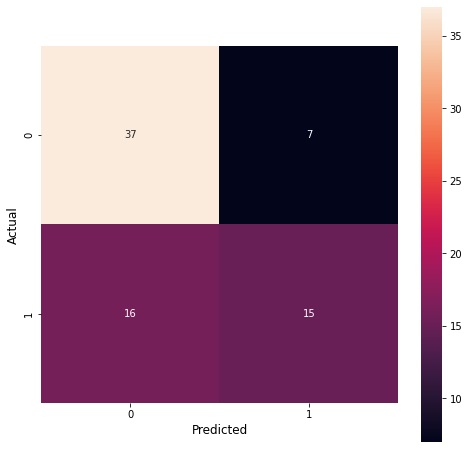

In [58]:
# Prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=42, max_depth=7, max_leaf_nodes=6).fit(X_train, y_train)
y_pred = clf.predict(X_test)


#generate classification report
print(classification_report(y_test, y_pred,))


#genrate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, annot=True, square=True, fmt='d', cbar=True)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show();

###Decision Tree (Baseline Result)
69% accuracy with 76% F score. The model is 68% correct in predicting if a person lives or dies given 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'.

###Random Forest Classifier

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.71      0.55      0.62        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.70        75
weighted avg       0.72      0.72      0.71        75



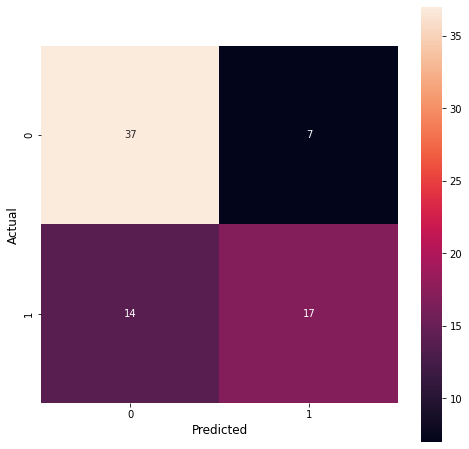

In [55]:
#instantiate RF classifier with default parameter
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier(random_state=42).fit(X_train, y_train)
pred = clf1.predict(X_test)


#generate classification report
print(classification_report(y_test, pred))


#genrate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, annot=True, square=True, fmt='d', cbar=True)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show();

Implementing a random forest model with default parameters gives a 72% accuracy with 78% F score. The model is 72% correct in predicting if a person lives or dies given 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'.

In [79]:
#optimize hyperparameter for RF

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#set params
param_dict = {'max_depth': [3,5,10, None],
              'n_estimators': [10, 100, 200, 300, 400, 500],
              'max_features': randint(1,9),
              'criterion': ['gini', 'entropy'],
              'bootstrap': [True, False],
              'min_samples_leaf': randint(1,9),
}

#instantiate model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

#instantiate randomizedsearchcv
rf_cv = RandomizedSearchCV(rf, param_dict, cv=9, n_jobs =-1)

#fit on data
rf_cv.fit(X,y)


#print tuned parameters & score
print('Tuned params: {}'.format(rf_cv.best_params_))
print('Best score {}'.format(rf_cv.best_score_))

Tuned params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 100}
Best score 0.77688651218063


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.81      0.55      0.65        31

    accuracy                           0.76        75
   macro avg       0.78      0.73      0.74        75
weighted avg       0.77      0.76      0.75        75



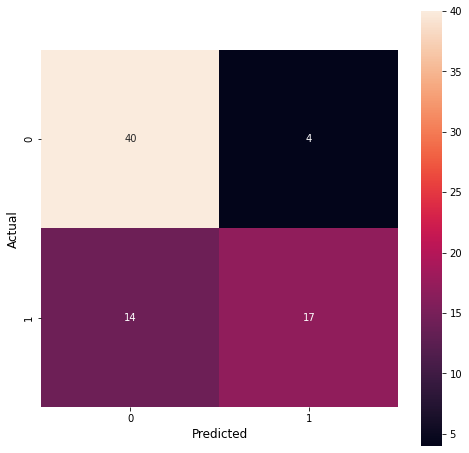

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
#instantiate model with best params
clf2 = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None, max_features= 1, 
                              min_samples_leaf= 3, n_estimators= 100, random_state=42).fit(X_train, y_train)

#make prediction
pred2 = clf2.predict(X_test)


#generate classification report
print(classification_report(y_test, pred2))


#genrate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, pred2)
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, annot=True, square=True, fmt='d', cbar=True)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show();

Implementing a random forest model with optimized parameters using RandomSearchCV gives a 76% accuracy with 72% F score. The model is 76% correct in predicting if a person lives or dies given 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'.

Further experiment would be to extract the mean accuracies from a list of models and optimize the parameters for the model with the highest mean accuracy, experiment with other scaling methods, and balanced target.